In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv("resumes_data.csv")  # Replace with the correct file path or data loading method
data.columns = ['file_name', 'title', 'word_count',
       'special_count', 'cont_count', 'content', 'name',
       'contact', 'summary', 'skills', 'education', 'experience',
       'certifications', 'accomplishments', 'achievements', 'hobbies',
       'languages', 'linkedin', 'github']
# df = data.groupby('title', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))
# data  = data.head(500)
data.head()


,file_name,title,word_count,special_count,cont_count,content,name,contact,summary,skills,education,experience,certifications,accomplishments,achievements,hobbies,languages,linkedin,github
0,ac01ih_turbine-controls-matlab-software-novi-m...,algorithm_engineer,1139,185,0,"* * * * * C a r l t o n W a y D r, N o v i, M ...",0,0,0,0,0,5,0,0,0,0,0,0,0
1,ace5so_semiconductor-models-signal-milpitas-ca...,algorithm_engineer,934,277,0,"Feng Ma\n\n** **** ***** *****,\nMilpitas, CA ...",0,0,1,2,3,4,0,0,0,0,0,0,0
2,acec8w_physics-data-analysis-spring-mills-pa.txt,algorithm_engineer,472,112,0,"Henry Albertson\nObjectives *** Maple Lane, Sp...",0,0,0,3,1,1,0,0,0,0,1,1,0
3,ad80wr_computer-vision-engineer-philadelphia-p...,algorithm_engineer,334,84,0,EXPERIENCE\nSKILL HIGHLIGHTS\nEDUCATION\nCONTA...,0,1,0,0,1,1,0,0,0,0,0,0,0
4,ac1j2o_selenium-js-ajax-html-mysql-san-jose-ca...,backend_developer,301,136,0,"Sheena Shah 408-***-****\nUnion City, CA - ***...",0,0,0,1,1,0,0,0,0,0,0,0,1


In [60]:
title_df = data.title.value_counts()
# Remove titles with less than 10 occurrences
title_df = title_df[title_df > 100]
title_df = title_df.reset_index()
title_df.columns = ['title', 'count']

# Filter the data to only include the titles with more than 100 occurrences
data = data[data.title.isin(title_df.title)]
data = data.reset_index(drop=True)
data.head()

,file_name,title,word_count,special_count,cont_count,content,name,contact,summary,skills,education,experience,certifications,accomplishments,achievements,hobbies,languages,linkedin,github
0,abnrvu_trabajo-datawarehouse-infopath-fort-lau...,bi_analyst,1370,370,0,EXECUTIVE SUMMARY\n•Professional experienced w...,0,0,0,1,1,7,1,0,1,0,0,0,0
1,abych7_bi-service-call-credit-card-vm-mvs-irvi...,bi_analyst,1031,291,0,Deborah Long Chambers Page -\nResume\nDEBORAH ...,0,0,0,2,1,3,0,0,0,0,1,0,0
2,ac01fo_mathematics-dance-math-austin-tx-78758.txt,bi_analyst,768,222,0,"Caitlin Amanda Hogan\nAustin, Texas ***** 954-...",0,0,0,1,3,1,0,3,0,0,0,1,0
3,ac08de_tableau-ssis-etl-cognos-bi-sql-tempe-az...,bi_analyst,369,89,0,Resume of:\nBrandon O’Loughlin 480-***-**** ac...,0,0,0,1,1,2,0,0,0,0,0,0,0
4,ac0z8q_tableau-bi-data-mining-js-charlotte-nc.txt,bi_analyst,1127,231,0,Saahithi Jyothy Surapaneni\n1-980-***-**** ac0...,0,0,0,1,1,11,0,0,0,0,0,0,0


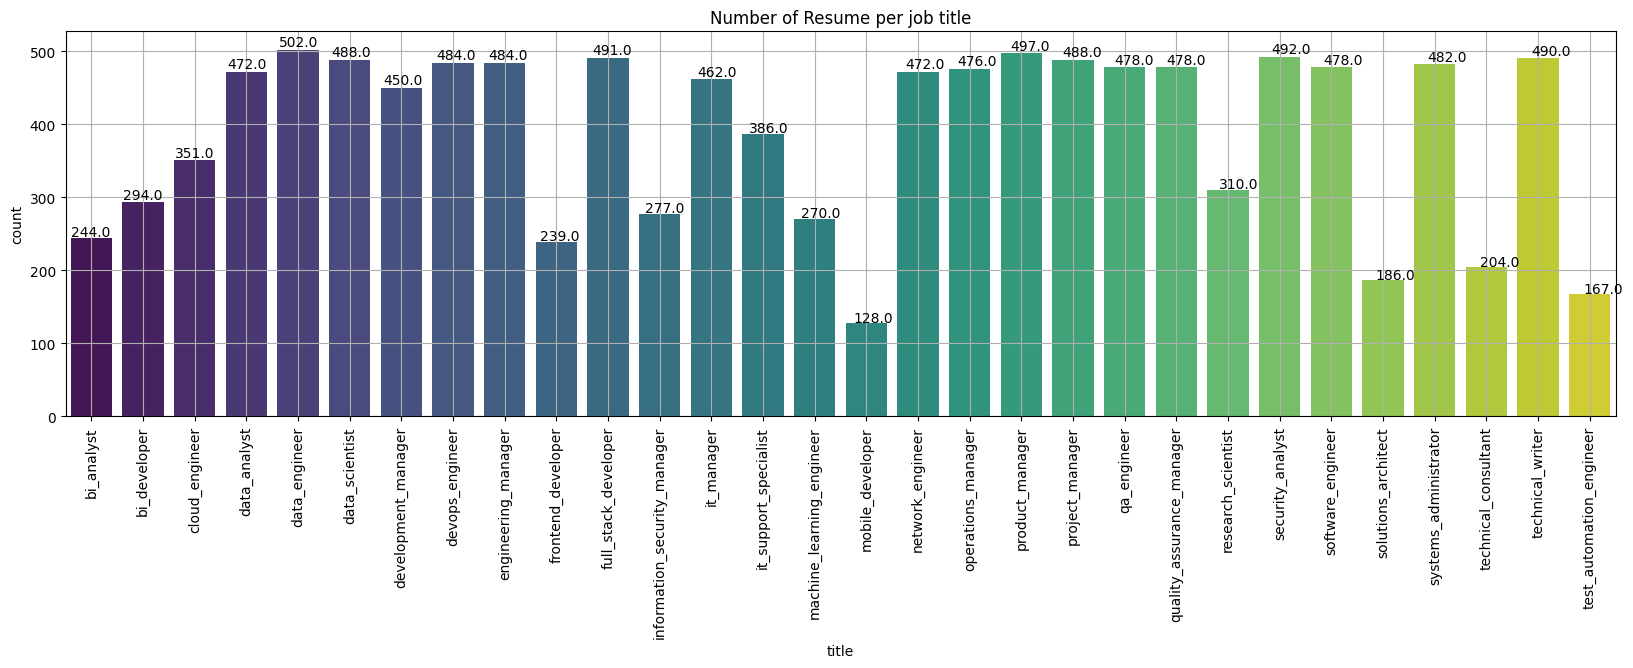

In [31]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
ax = sns.countplot(x="title", data=data, palette="viridis", hue="title")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.title("Number of Resume per job title")
plt.grid()
plt.show()

Average word count for bi_analyst is 904.922131147541
Average word count for bi_developer is 1508.4285714285713
Average word count for cloud_engineer is 1513.6951566951566
Average word count for data_analyst is 783.4279661016949
Average word count for data_engineer is 1377.6474103585658
Average word count for data_scientist is 950.6290983606557
Average word count for development_manager is 798.3955555555556
Average word count for devops_engineer is 1646.361570247934
Average word count for engineering_manager is 987.3822314049587
Average word count for frontend_developer is 602.9707112970711
Average word count for full_stack_developer is 1155.7169042769858
Average word count for information_security_manager is 1137.6028880866427
Average word count for it_manager is 991.4004329004329
Average word count for it_support_specialist is 683.1943005181347
Average word count for machine_learning_engineer is 611.7666666666667
Average word count for mobile_developer is 838.3203125
Average word cou

/var/folders/r3/x33m7bkj4dxcdt5jwwgg27xc0000gn/T/ipykernel_12408/3006061404.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="title", y="avg_word_count", data=avg_word_count_df, palette="viridis")


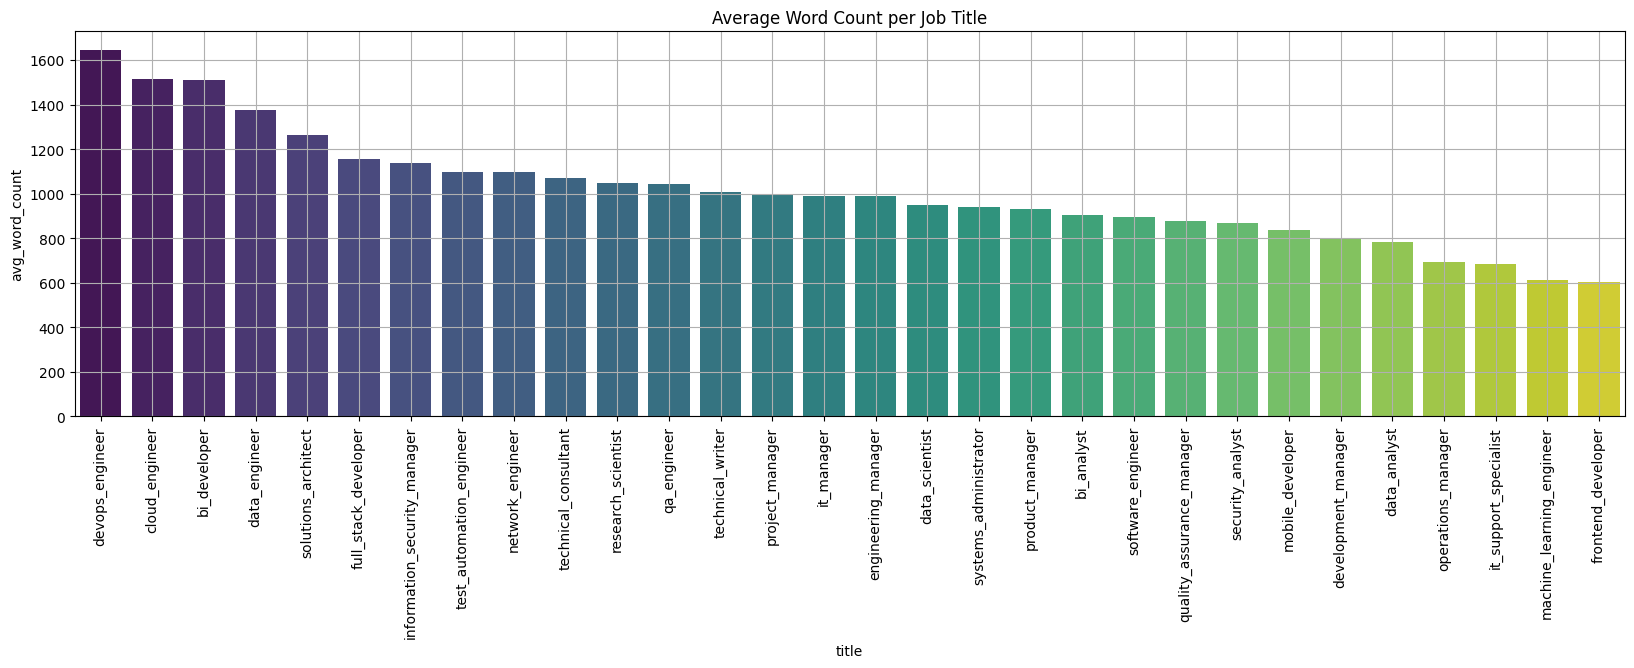

In [34]:
def avg_word_count(data, title):
    return data[data.title == title].word_count.mean()

for title in data.title.unique():
    print(f"Average word count for {title} is {avg_word_count(data, title)}")


avg_word_count_df = pd.DataFrame(data.title.unique(), columns=['title'])
avg_word_count_df['avg_word_count'] = avg_word_count_df.title.apply(lambda x: avg_word_count(data, x))
avg_word_count_df = avg_word_count_df.sort_values(by='avg_word_count', ascending=False)
avg_word_count_df = avg_word_count_df.reset_index(drop=True)

# Plot the average word count per title
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x="title", y="avg_word_count", data=avg_word_count_df, palette="viridis")
plt.title("Average Word Count per Job Title")
plt.grid()
plt.show()

/var/folders/r3/x33m7bkj4dxcdt5jwwgg27xc0000gn/T/ipykernel_12408/1728561680.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="title", y="avg_certification_count", data=avg_certification_count_df, palette="icefire")


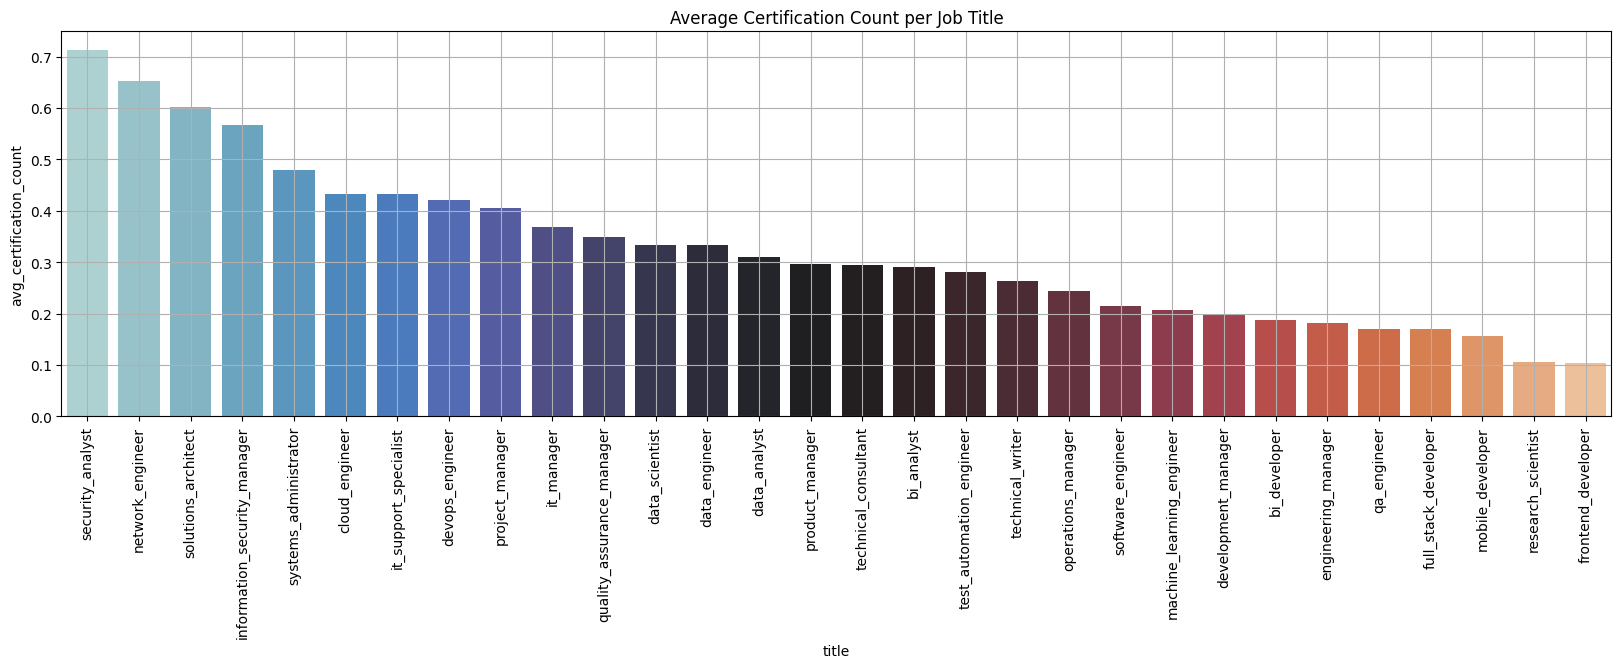

In [41]:
def avg_certification_count(data, title):
    return data[data.title == title].certifications.apply(lambda x: x).mean()


avg_certification_count_df = pd.DataFrame(data.title.unique(), columns=['title'])
avg_certification_count_df['avg_certification_count'] = avg_certification_count_df.title.apply(lambda x: avg_certification_count(data, x))
avg_certification_count_df = avg_certification_count_df.sort_values(by='avg_certification_count', ascending=False)
avg_certification_count_df = avg_certification_count_df.reset_index(drop=True)

# Plot the average certification count per title
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x="title", y="avg_certification_count", data=avg_certification_count_df, palette="icefire")
plt.title("Average Certification Count per Job Title")
plt.grid()
plt.show()

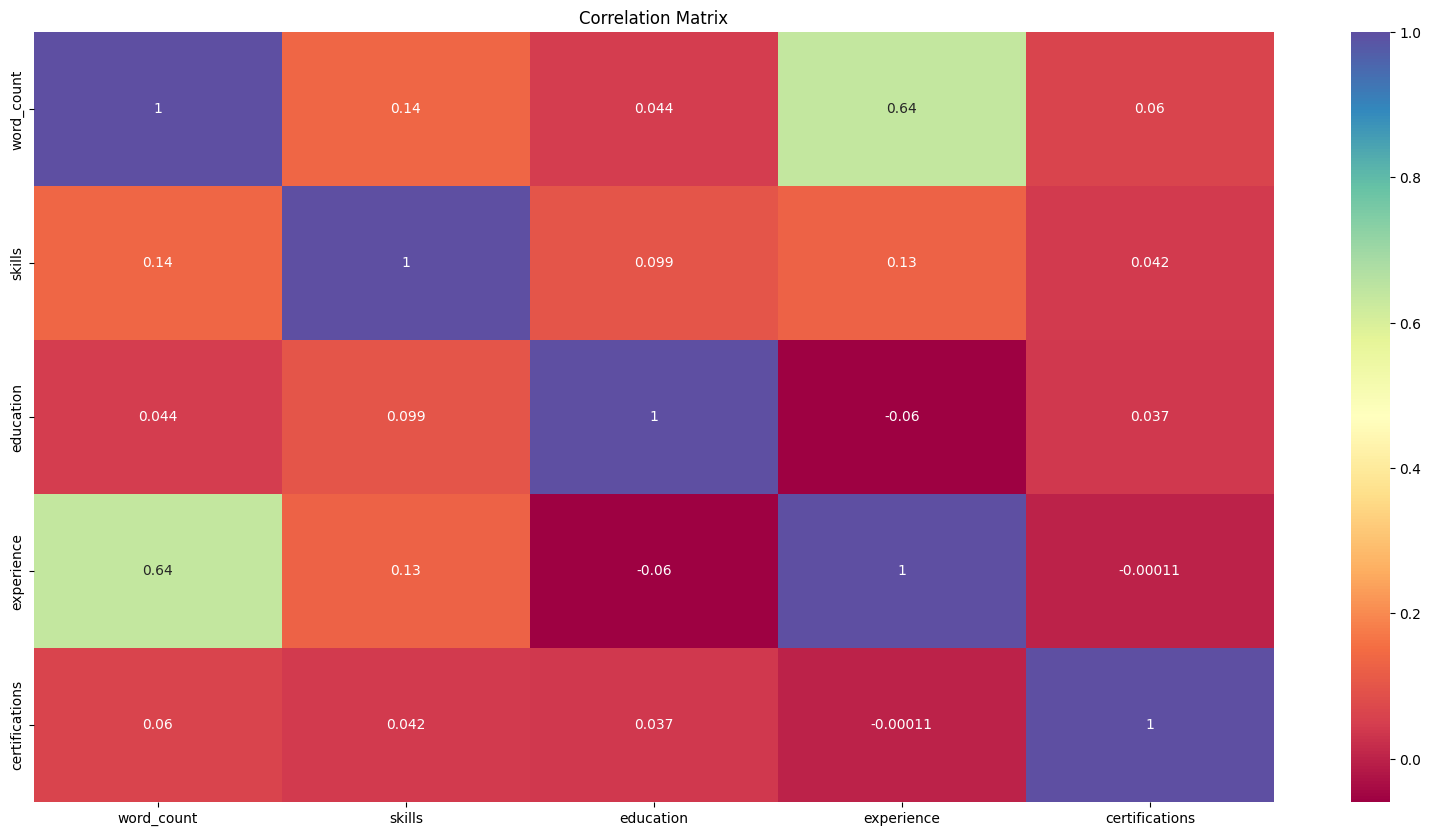

In [47]:
# Heatmap - Correlation matrix between numeric variables
plt.figure(figsize=(20, 10))
sns.heatmap(data[['word_count', 'skills', 'education', 'experience', 'certifications']].corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix between Numeric Variables')
plt.show()


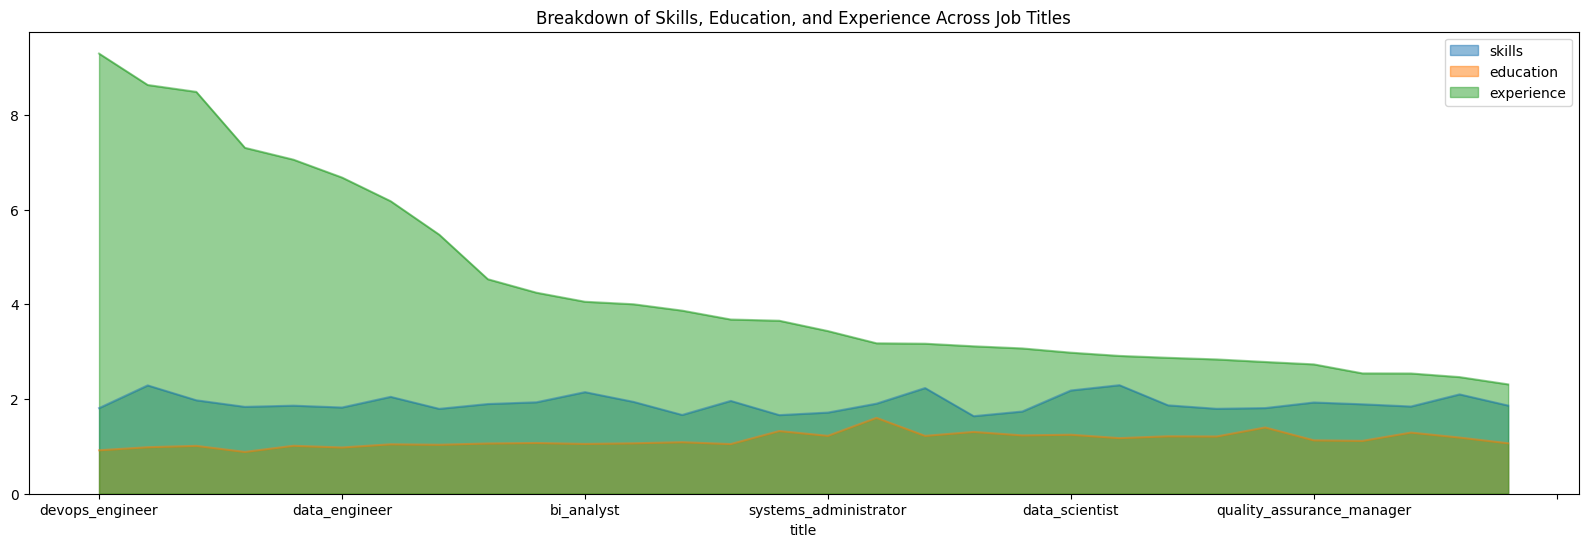

In [53]:
# Stacked area chart - Breakdown of skills, education, and experience across job titles
data_2 = data.groupby('title')[['skills', 'education', 'experience']].mean()
data_2 = data_2.sort_values(by='experience', ascending=False)
data_2.plot(kind='area', stacked=False, figsize=(20, 6))
plt.title('Breakdown of Skills, Education, and Experience Across Job Titles')
plt.show()



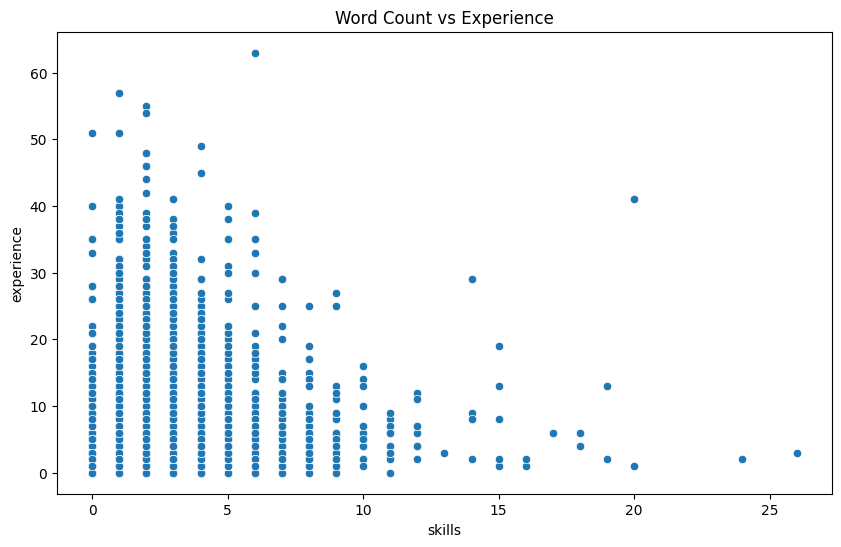

In [62]:
# Plot the correlation between wordcount and experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='skills', y='experience', data=data)
plt.title('Word Count vs Experience')
plt.show()

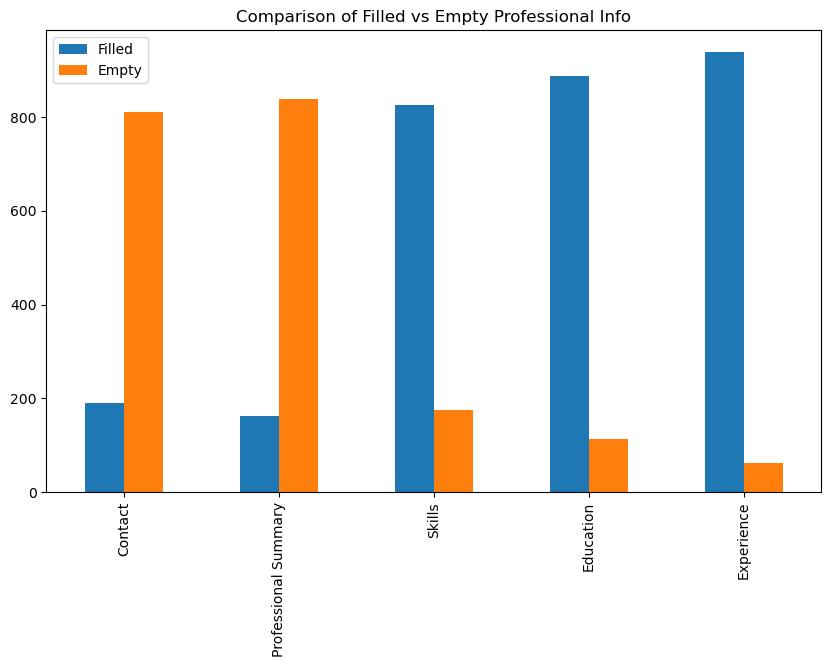

In [ ]:
# Grouped bar chart - Comparison of resumes with professional info filled versus missing
prof_fields = ['Contact', 'Professional Summary', 'Skills', 'Education', 'Experience']
filled_data = data[prof_fields].apply(lambda x: x != 0).sum()
empty_data = data[prof_fields].apply(lambda x: x == 0).sum()
df_filled_empty = pd.DataFrame({'Filled': filled_data, 'Empty': empty_data})
df_filled_empty.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Filled vs Empty Professional Info')
plt.show()


<Figure size 2000x1000 with 0 Axes>

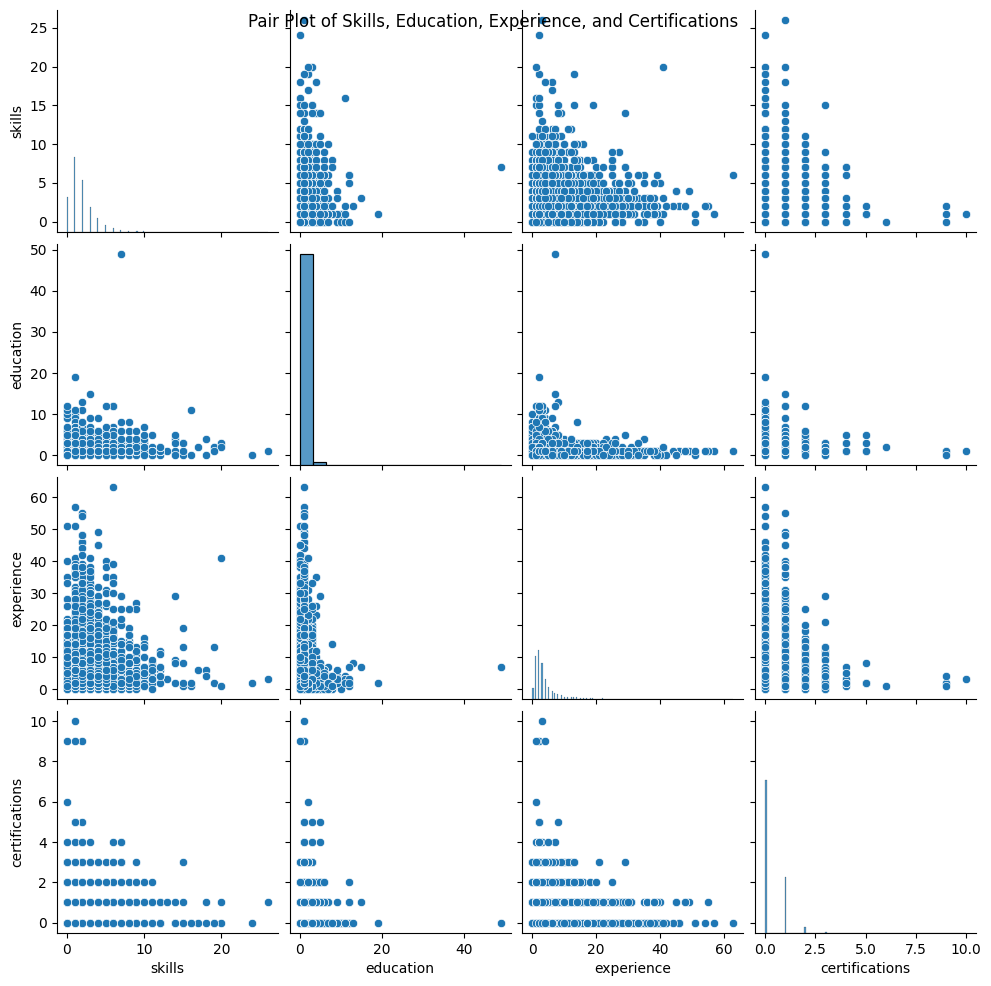

In [65]:
# Pair plot - Relations among multiple numerical features
plt.figure(figsize=(20, 10))
sns.pairplot(data[['skills', 'education', 'experience', 'certifications']])
# Add main title
plt.suptitle('Pair Plot of Skills, Education, Experience, and Certifications')
plt.show()


/var/folders/r3/x33m7bkj4dxcdt5jwwgg27xc0000gn/T/ipykernel_12408/1059344229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='education', y='skills', data=data, palette='Spectral')


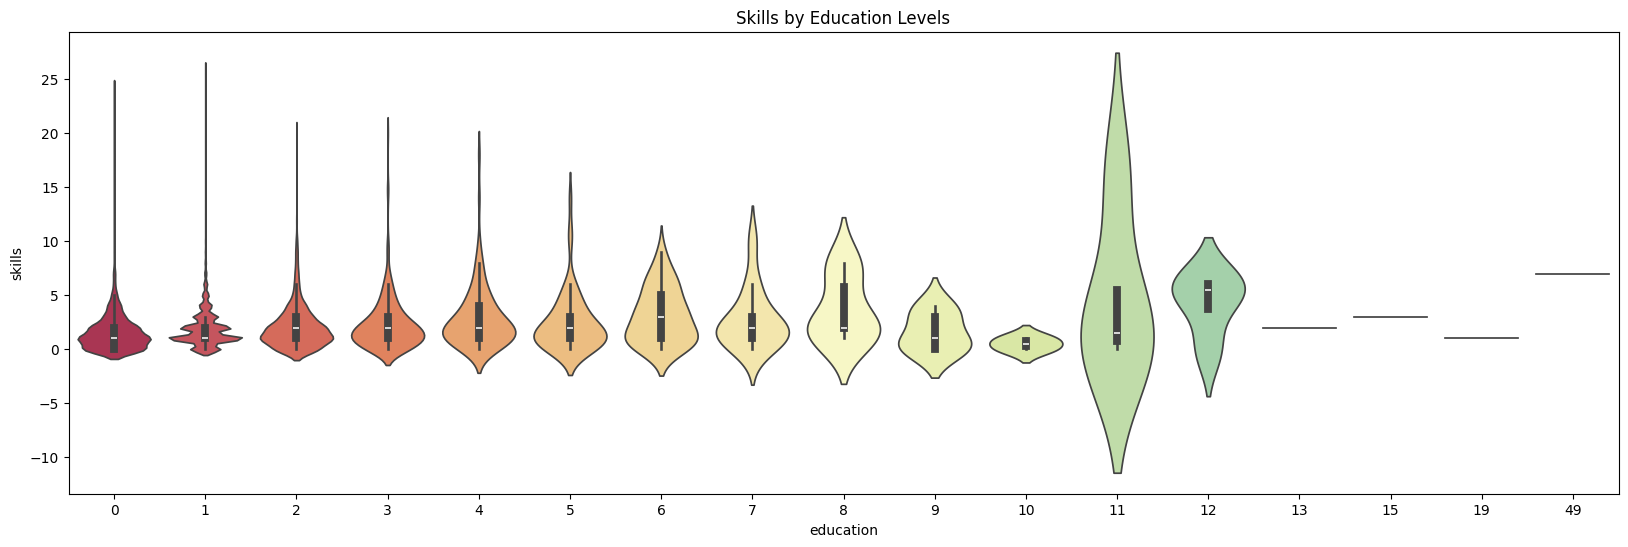

In [73]:
# Violin plot - Comparison of skills by education levels
plt.figure(figsize=(20, 6))
sns.violinplot(x='education', y='skills', data=data, palette='Spectral')
plt.title('Skills by Education Levels')
plt.show()


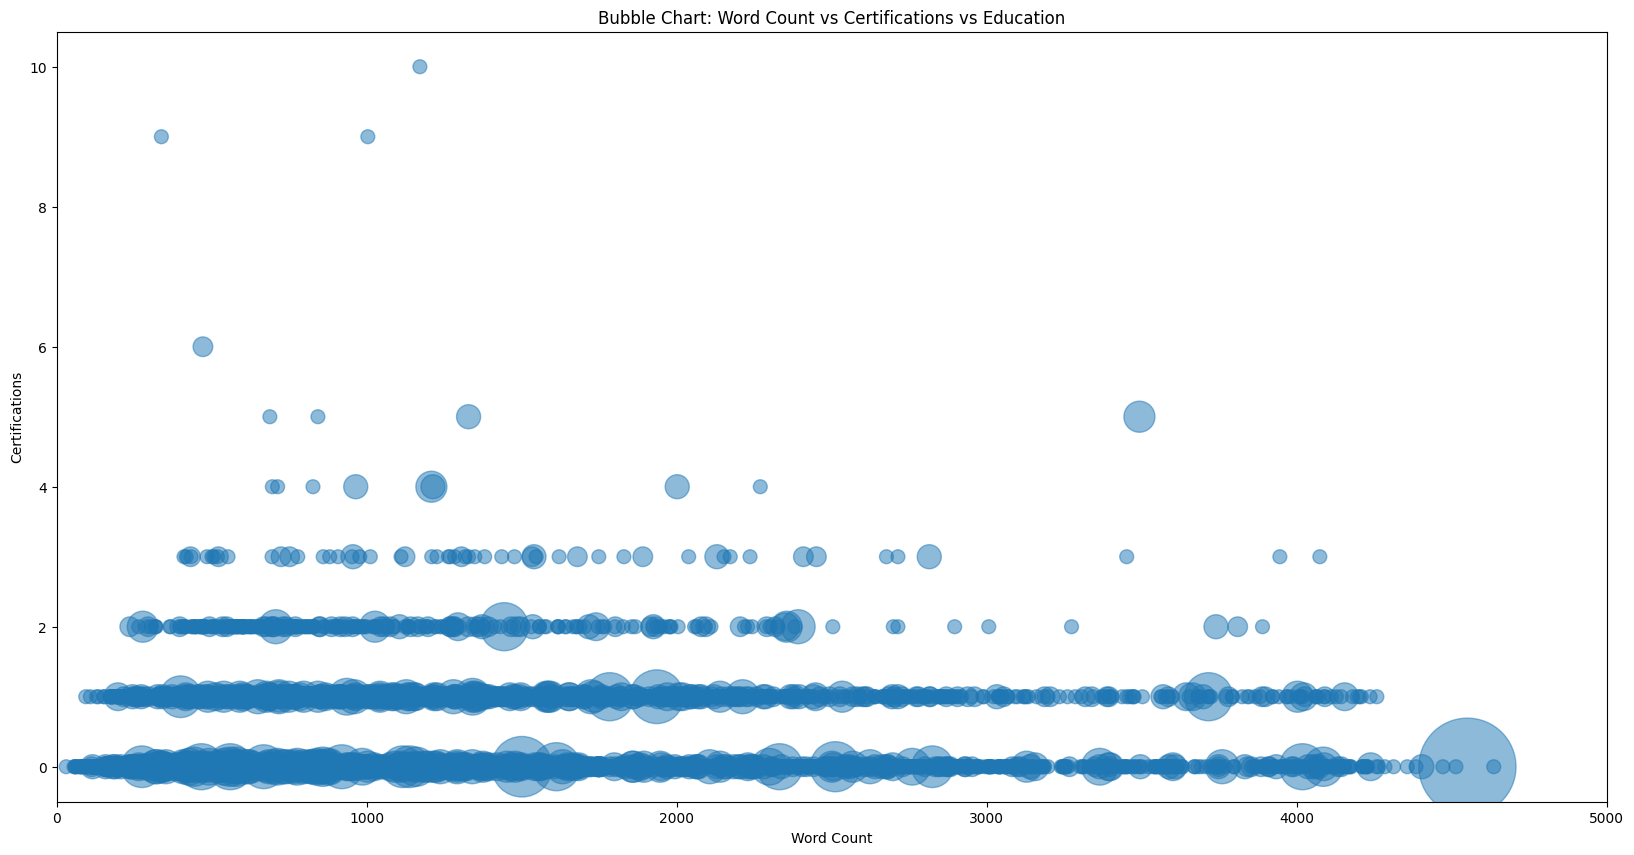

In [89]:
# Bubble chart - Word count vs Certifications vs Education
plt.figure(figsize=(20, 10))
plt.scatter(data['word_count'], data['certifications'], s=data['education']*100, alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('Certifications')
plt.title('Bubble Chart: Word Count vs Certifications vs Education')
plt.xlim(0, 5000)
plt.show()


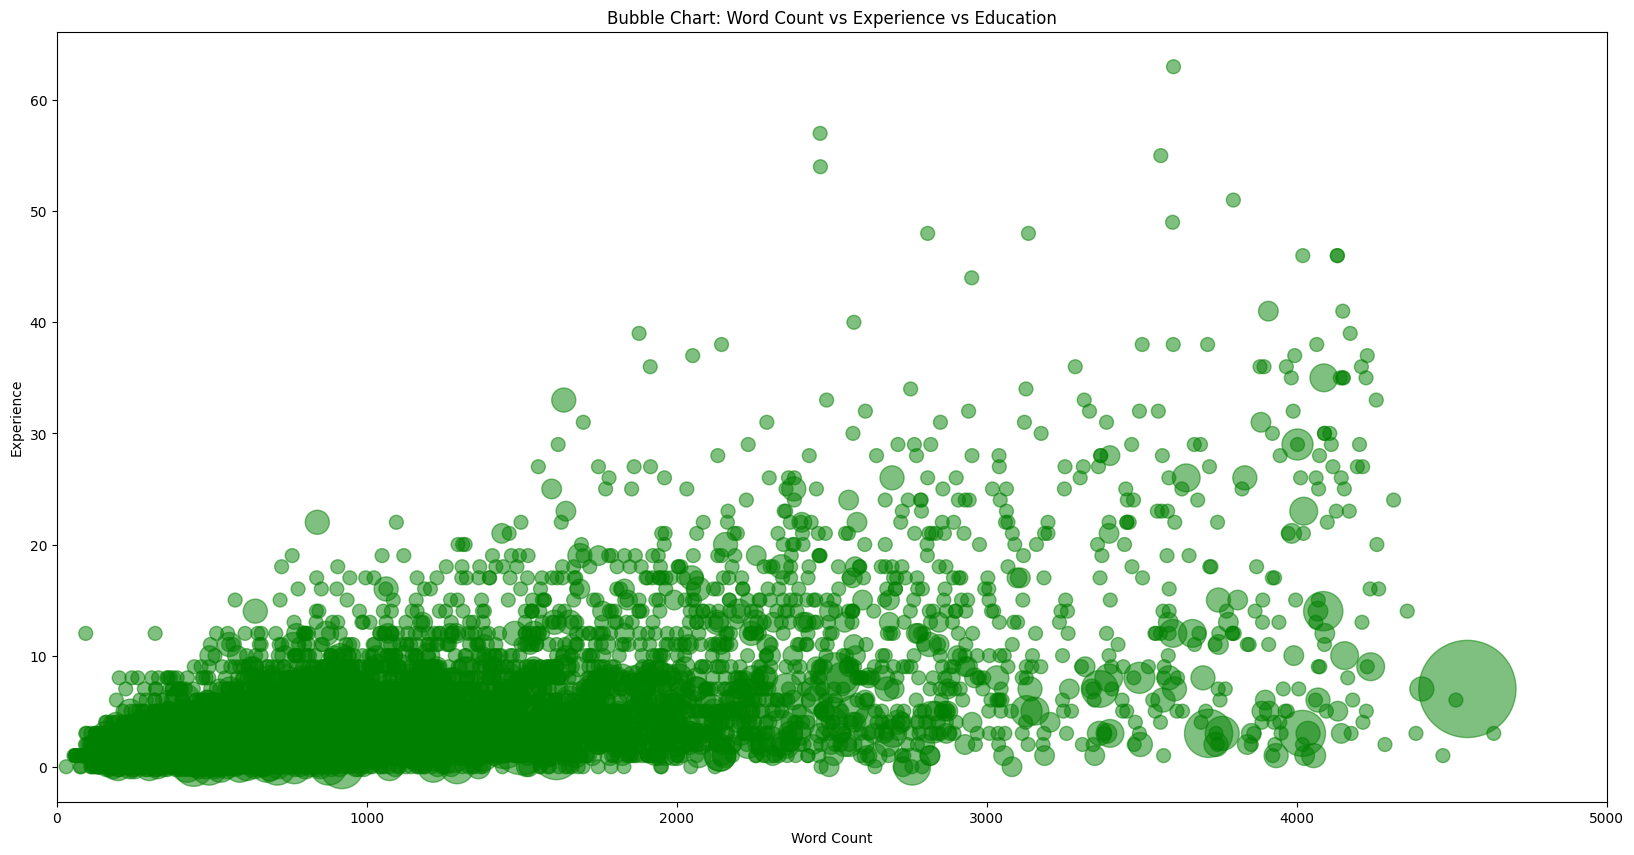

In [91]:
# Bubble chart - Word count vs Certifications vs Education
plt.figure(figsize=(20, 10))
plt.scatter(data['word_count'], data['experience'], s=data['education']*100, alpha=0.5, c='green')
plt.xlabel('Word Count')
plt.ylabel('Experience')
plt.title('Bubble Chart: Word Count vs Experience vs Education')
plt.xlim(0, 5000)
plt.show()
